# Image stats and image processing
This notebook follows on from the image loading and pixel manipulation notebook.

This will introduce some simple stats, smoothing, and basic image processing.

But first let us include what we need to include and load up our test image.

In [2]:
%matplotlib inline
import cv2
import common
import video
import numpy as np
import cv2
from matplotlib import pyplot as plt

input_image=cv2.imread('noidea.jpg')

## Basic manipulations

Rotate, flip... 

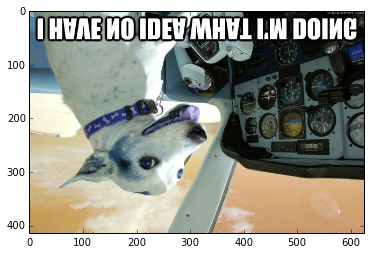

In [54]:
flipped_code_0=cv2.flip(input_image,0) # vertical flip
plt.imshow(flipped_code_0)

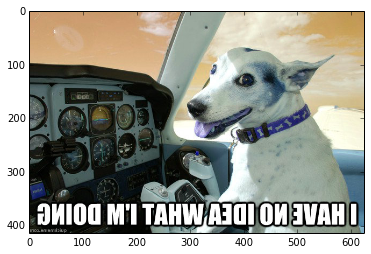

In [55]:
flipped_code_1=cv2.flip(input_image,1) # horizontal flip
plt.imshow(flipped_code_1)

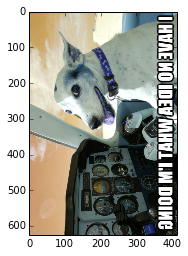

In [56]:
transposed=cv2.transpose(input_image)
plt.imshow(transposed)

## Minimum, maximum

To find the min or max of a matrix, you can use minMaxLoc. This takes a single channel image (it doesn't make much sense to take the max of a 3 channel image). So in the next code snippet you see a for loop, using python style image slicing, to look at each channel of the input image separately. 

In [12]:
for i in range(0,3):
   min_value, max_value, min_location, max_location=cv2.minMaxLoc(input_image[:,:,i])
   print "min {} is at {}, and max {} is at {}".format(min_value, min_location, max_value, max_location)


min 0.0 is at (175, 117), and max 255.0 is at (577, 37)
min 0.0 is at (446, 146), and max 255.0 is at (257, 81)
min 0.0 is at (524, 122), and max 255.0 is at (257, 81)


## Arithmetic operations on images

OpenCV has a lot of functions for doing mathematics on images. Some of these have "analogous" numpy alternatives, but it is nearly always better to use the OpenCV version. The reason for this that OpenCV is designed to work on images and so handles overflow better (OpenCV add, for example, truncates to 255 if the datatype is image-like and 8 bit; Numpy's alternative wraps around).

Useful arithmetic operations include add and addWeighted, which combine two images that are the same size. 

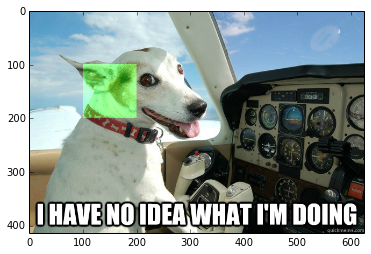

In [51]:
#First create an image the same size as our input
blank_image = np.zeros((input_image.shape), np.uint8)

blank_image[100:200,100:200,1]=100; #give it a green square

new_image=cv2.add(blank_image,input_image) # add the two images together

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

## Noise reduction
